In [3]:
!pip install tensorflow_hub

In [10]:
import tensorflow_hub as hub
import tensorflow as tf
from matplotlib import pyplot as plt
import cv2
import numpy as np

In [5]:
model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

In [6]:
def load_model(img_path):
    img = tf.io.read_file(img_path)
    img = tf.image.decode_image(img, channels = 3)
    img = tf.image.convert_image_dtype(img, tf.float32)
    img = img[tf.newaxis, :]
    return img

In [8]:
content_img = load_model('content.jpeg')
style_img = load_model('style.png')

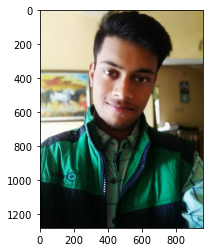

In [11]:
plt.imshow(np.squeeze(content_img))

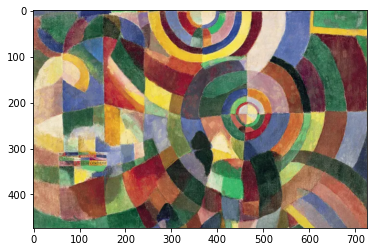

In [12]:
plt.imshow(np.squeeze(style_img))

In [13]:
generated_img = model(tf.constant(content_img), tf.constant(style_img))[0]

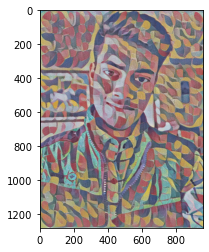

In [14]:
plt.imshow(np.squeeze(generated_img))

In [16]:
cv2.imwrite('generated_img.jpg', cv2.cvtColor(np.squeeze(generated_img)*255, cv2.COLOR_BGR2RGB))

True